In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import sigmoid_kernel
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("Mamaearth.csv")

In [4]:
df.head()

,Product_Name,Product Link,Rating,Reviews,MRP,Pack_Size,Discount,Key_Ingredients,Category,Tokens
0,Tea Tree Facewash for acne & pimples,https://mamaearth.in/product/teatreefacewash,4.8,For baby skin that constantly flaked and dry t...,Rs.249.00,100ml,NaN,Neem Aloe Vera Tea Tree Oil,Face Wash,tea tree facewash acne pimple
1,Anti Hair Fall Kit for complete hair care,https://mamaearth.in/product/antihairfallkit,4.8,With changing weather I tend to get itchy and ...,Rs.1199.00,NaN,(25% off),Bhringraj Oil Biotin All hair type The kit ...,Hair Kit,anti hair fall kit complete hair care
2,Argan Hair Mask with Argan Avocado Oil and Mil...,https://mamaearth.in/product/arganhairmask,4.8,It is the best charcoal face mask i have ever ...,Rs.599.00,200ml,NaN,Argan Oil,Hair Oil,argan hair mask argan avocado oil milk protein...
3,Ubtan Bamboo Sheet Mask with Turmeric & Saffro...,https://mamaearth.in/product/ubtanbamboosheetm...,5.0,Very good product with good customer service,Rs.149.00,25 g,NaN,Turmeric,NaN,ubtan bamboo sheet mask turmeric saffron skin ...
4,Niacinamide Bamboo Sheet Mask with Niacinamide...,https://mamaearth.in/product/niacinamidebamboo...,5.0,Firstly I would like to say that I like all th...,Rs.149.00,25 g,NaN,Niacinamide,NaN,niacinamide bamboo sheet mask niacinamide ging...


In [5]:
data = df[["Product_Name","Tokens"]]
data.head()

,Product_Name,Tokens
0,Tea Tree Facewash for acne & pimples,tea tree facewash acne pimple
1,Anti Hair Fall Kit for complete hair care,anti hair fall kit complete hair care
2,Argan Hair Mask with Argan Avocado Oil and Mil...,argan hair mask argan avocado oil milk protein...
3,Ubtan Bamboo Sheet Mask with Turmeric & Saffro...,ubtan bamboo sheet mask turmeric saffron skin ...
4,Niacinamide Bamboo Sheet Mask with Niacinamide...,niacinamide bamboo sheet mask niacinamide ging...


In [6]:
data = data.drop_duplicates()

In [7]:
token = data['Tokens']

In [8]:
word_count = Counter(''.join(token).split()).most_common(30)

In [9]:
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

           Word  Frequency
0          hair         50
1          face         43
2          skin         41
3             c         34
4           oil         26
5          wash         24
6          mask         22
7          tree         20
8      turmeric         19
9          body         18
10      shampoo         17
11        onion         16
12      vitamin         15
13         fall         13
14          bye         13
15        water         13
16         free         11
17        serum         11
18      control         10
19         deep         10
20       coffee         10
21        cocoa         10
22       bamboo          9
23        cream          9
24  conditioner          9
25         acne          8
26        sheet          8
27        combo          8
28         glow          8
29          tea          7


In [10]:
def get_type():
    '''
    answers: hair, skin, body
    '''
    type = input("Where do you have the problem?")
    type = " ".join(["".join(n.split()) for n in type.lower().split(',')])
    return type

def get_major():
    '''
    answers: acne, glowing, hair fall
    '''
    major = input("what is the major concern?")
    major = " ".join(["".join(n.split()) for n in major.lower().split(',')])
    return major

def get_product():
    '''
    answers : face wash, shampoo, serum
    '''
    product = input("What kind of product do you want?")
    product = " ".join(["".join(n.split()) for n in product.lower().split(',')])
    return product

def get_searchTerms():
  searchTerms = [] 

  type = get_type()
  if type != 'skip':
    searchTerms.append(type)

  major = get_major()
  if major != 'skip':
    searchTerms.append(major)

  product = get_product()
  if product != 'skip':
    searchTerms.append(product)
    
  return searchTerms

# Cosine Similarity

In [12]:
def make_recommendation(data=data):
  new_row = data.iloc[-1,:].copy() 
  
  searchTerms = get_searchTerms()  
  new_row.iloc[-1] = " ".join(searchTerms) 
  
  data = data.append(new_row)
  
  count = CountVectorizer(stop_words='english')
  count_matrix = count.fit_transform(data['Tokens'])

  cosine_sim2 = cosine_similarity(count_matrix, count_matrix) 
  #print(cosine_sim2)
  
  sim_scores = list(enumerate(cosine_sim2[-1,:]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  #print(sim_scores)

  ranked_titles = []
  for i in range(1, 11):
    indx = sim_scores[i][0]
    ranked_titles.append(data['Product_Name'].iloc[indx])
  
  return ranked_titles


make_recommendation()

Where do you have the problem? hair
what is the major concern? hair loss
What kind of product do you want? oil


C:\Users\sachinika.pathirana_\AppData\Local\Temp\ipykernel_12816\2476188184.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row)


['Argan Hair Oil with Argan Oil & Avocado Oil for FrizzFree & Stronger Hair ',
 'Onion Hair Oil for Hair Regrowth & Hair Fall Control',
 'Onion Hair Oil for Hair Regrowth and Hair Fall Control with Redensyl',
 'Root Restore Hair Oil for hair fall reduction',
 'BhringAmla Hair Oil with Bhringraj & Amla for Intense Hair Treatment â€“',
 'Tea Tree Hair Oil with Tea Tree & Ginger Oil for Dandruff Free Hair â€“',
 'Onion Hair Serum and Onion Hair Oil Combo',
 'Onion Hair Oil and Onion Hair Mask Combo',
 'Rice Hair Oil with Rice Bran & Coconut Oil For Damage Repair â€“',
 'Castor Oil for Healthier Skin Hair and Nails with 100% Pure and Natural ColdPressed Oil']

# Sigmoid Kernal

In [13]:
def make_recommendation2(data=data):
  new_row = data.iloc[-1,:].copy() 
  
  searchTerms = get_searchTerms()  
  new_row.iloc[-1] = " ".join(searchTerms) 
  
  data = data.append(new_row)
  
  count = CountVectorizer(stop_words='english')
  count_matrix = count.fit_transform(data['Tokens'])

  sig_sim2 = sigmoid_kernel(count_matrix, count_matrix) 
  #print(sig_sim2)
  
  sim_scores = list(enumerate(sig_sim2[-1,:]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  #print(sim_scores)

  ranked_titles = []
  for i in range(1, 11):
    indx = sim_scores[i][0]
    ranked_titles.append(data['Product_Name'].iloc[indx])
  
  return ranked_titles


make_recommendation2()

Where do you have the problem? skin
what is the major concern? dark spots
What kind of product do you want? cream


C:\Users\sachinika.pathirana_\AppData\Local\Temp\ipykernel_12816\114457117.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row)


['Hydrating Natural Body Lotion with Cucumber & Aloe Vera for Normal Skin ',
 'Spotless Skin Combo: Ubtan Facewash  100ml and Bye Bye Blemishes Face Cream ',
 'Vitamin C Face Cream with Vitamin C & SPF 20 for Skin Illumination',
 'Skin Illuminate Face Serum for Radiant Skin with Vitamin C & Turmeric â€“',
 'Vitamin C Face Scrub for Glowing Skin With Vitamin C and Walnut For Skin Illumination â€“',
 'Charcoal Face Scrub For Oily Skin & Normal skin with Charcoal & Walnut for Deep Exfoliation ',
 'Skin Plump Serum For Face Glow with Hyaluronic Acid & Rosehip Oil for Ageless Skin ',
 'Ubtan Bamboo Sheet Mask with Turmeric & Saffron for Skin Brightening ',
 'Niacinamide Bamboo Sheet Mask with Niacinamide & Ginger Extract for Clear & Glowing Skin ',
 'Vitamin C Body Lotion with Vitamin C & Honey for Radiant Skin ']

# Clustering the products

In [11]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['Tokens'])

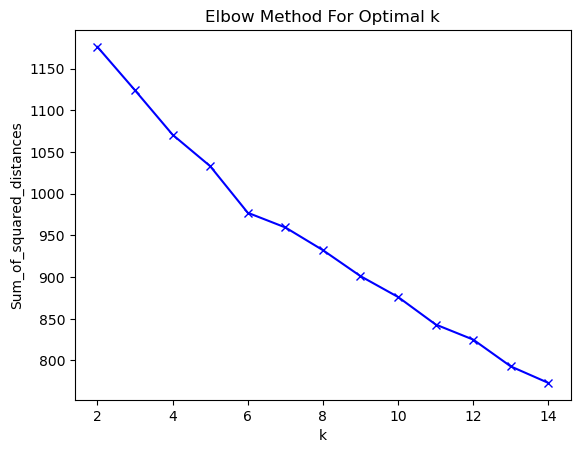

In [16]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(count_matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(count_matrix)
labels=model.labels_
data_clus=pd.DataFrame(list(zip(data['Product_Name'],data['Tokens'],labels)),columns=['Product Name','Tokens','cluster'])
print(data_clus.sort_values(by=['cluster']))

                                          Product Name  \
50   Rice Hair Oil with Rice Bran & Coconut Oil For...   
147       Healthy Hair Combo : Shampoo and Conditioner   
122          Tea Tree Shampoo and Onion Hair Oil Combo   
148                   Tea Tree Anti Dandruff Hair Mask   
139                              Hair Fall Control Kit   
..                                                 ...   
29   Bye Bye Dark Circles Eye Cream with Cucumber &...   
121  Bye Bye Blemishes 30g and Bye Bye Dark Circles...   
120  Skin Illuminate Face Serum and Bye Bye Dark Ci...   
35   Bye Bye Blemishes Face Cream for Reducing Pigm...   
8    Spotless Skin Combo: Ubtan Facewash  100ml and...   

                                                Tokens  cluster  
50   rice hair oil rice bran coconut oil damage repair        0  
147             healthy hair combo shampoo conditioner        0  
122              tea tree shampoo onion hair oil combo        0  
148                   tea tree anti dan

Cluster: 0
Titles
         Anti Hair Fall Kit for complete hair care
Argan Hair Mask with Argan Avocado Oil and Milk...
Argan Conditioner with Argan & Apple Cider Vine...
          Tea Tree Shampoo for Dandruff Free Hair 
Tea Tree Conditioner with Tea Tree & Ginger Oil...
Rice Hair Oil with Rice Bran & Coconut Oil For ...
Rice Water Conditioner with Rice Water & Kerati...
Tea Tree Hair Oil with Tea Tree & Ginger Oil fo...
Argan Hair Oil with Argan Oil & Avocado Oil for...
                       Essential AntiHair Fall Kit
                         Hair Fall Reduction Combo
                   Argan Hair Mask & Argan Shampoo
BhringAmla Conditioner with Bhringraj & Amla fo...
BhringAmla Shampoo with Bhringraj & Amla for In...
BhringAmla Hair Oil with Bhringraj & Amla for I...
BhringAmla Hair Mask with Bhringraj & Amla for ...
Argan Shampoo with Argan & Apple Cider Vinegar ...
         Tea Tree Shampoo and Onion Hair Oil Combo
             Tea Tree AntiDandruff Hair Regime Kit
             

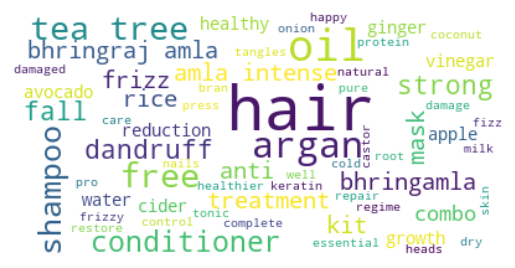

Cluster: 1
Titles
              Tea Tree Facewash for acne & pimples
                       Onion Shampoo and Oil Combo
                                      AntiAcne Kit
                              Hairfall Control Kit
Ubtan Face Scrub with Turmeric & Walnut for Tan...
Ultra Light Indian Sunscreen with Carrot Seed T...
                   Ubtan Face Wash for Tan Removal
Apple Cider Vinegar Foaming Face Wash with Appl...
Ubtan Foaming Face Wash with Turmeric & Saffron...
Tea Tree Body Wash With Tea Tree & Neem For Ski...
Charcoal Body Wash With Charcoal & Mint for Dee...
Rice Water Shampoo With Rice Water and Keratin ...
Tea Tree Body Wash With Tea Tree & Neem For Ski...
Charcoal Body Wash With Charcoal & Mint for Dee...
Retinol Night Cream For Women with Retinol & Ba...
Retinol Face Wash with Retinol & Bakuchi for Fi...
Niacin Face Toner with Niacinamide & Witch Haze...
Tea Tree Foaming Face Wash with Tea Tree & Sali...
                               Tea Tree Face Serum
             

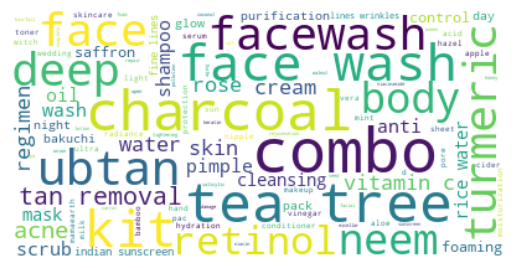

Cluster: 2
Titles
          Onion Shampoo and Onion Hair Serum Combo
Onion Shampoo for Hair Growth & Hair Fall Contr...
Onion Scalp Serum with Onion & Niacinamide for ...
Onion Hair Mask For Hair Fall Control With Onio...
         Onion Hair Serum and Onion Hair Oil Combo
Onion Hair Oil for Hair Regrowth & Hair Fall Co...
Onion Hair Serum with Onion & Biotin for Strong...
Onion Shampoo for Hair Growth and Hair Fall Con...
Onion Conditioner for Hair Growth and Hair Fall...
Onion Shampoo for Hair Growth and Hair Fall Con...
Hair Regrowth Combo : Onion Shampoo and Onion C...
Onion Hair Oil for Hair Regrowth and Hair Fall ...
Hair Fall Control Regime Combo: Onion Shampoo 2...
          Onion Hair Oil and Onion Hair Mask Combo
Onion Shampoo 400ml and Onion Conditioner 250ml...
        Onion Hair Serum and Onion Hair Mask Combo


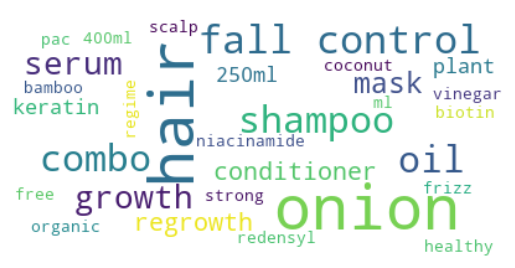

Cluster: 3
Titles
Ubtan Bamboo Sheet Mask with Turmeric & Saffron...
Niacinamide Bamboo Sheet Mask with Niacinamide ...
Vitamin C Body Lotion with Vitamin C & Honey fo...
Ubtan Body Lotion with Turmeric & Kokum Butter ...
Vitamin C Foaming Face Wash with Vitamin C & Tu...
Vitamin C Face Wash with Vitamin C and Turmeric...
Vitamin C Face Cream with Vitamin C & SPF 20 fo...
Vitamin C Face Mask With Vitamin C & Kaolin Cla...
Vitamin C Sleeping Mask with Aloe Vera for Skin...
Vitamin C Face Toner with Vitamin C & Cucumber ...
Aloe Vera Gel with Pure Aloe Vera & Vitamin E f...
Skin Correct Face Serum with Niacinamide and Gi...
Skin Illuminate Face Serum for Radiant Skin wit...
       OilFree Face Moisturizer for AcneProne Skin
Skin Lightening & Brightening Combo : Ubtan Fac...
Ubtan Face Mask with Saffron & Turmeric for Ski...
Vitamin C Body Wash with Vitamin C & Honey for ...
Vitamin C Face Scrub for Glowing Skin With Vita...
Ubtan Body Wash With Turmeric & Saffron for Glo...
Vitamin C Bod

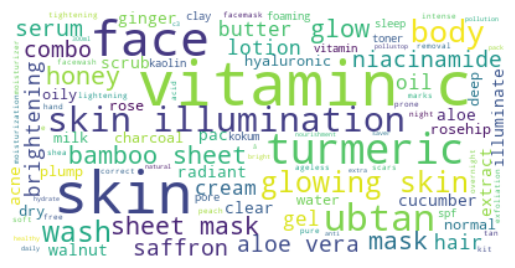

Cluster: 4
Titles
CoCo Body Wash With Coffee & Cocoa For Skin Awa...
                   Coco Intense Skin Awakening Kit
CoCo Bamboo Sheet Mask with Coffee & Cocoa for ...
CoCo Face Wash with Coffee & Cocoa for Skin Awa...
CoCo Body Lotion With Coffee and Cocoa for Inte...
CoCo Hand Cream with Coffee & Cocoa for Rich Mo...
CoCo Face Wash with Coffee & Cocoa for Skin Awa...
CoCo Face Scrub with Coffee & Cocoa for Rich Ex...
CoCo Face Mask with Coffee & Cocoa for Skin Awa...
CoCo Yogurt with Coffee and Cocoa for Rich Mois...
CoCo Body Butter for Dry Skin with Coffee & Coc...


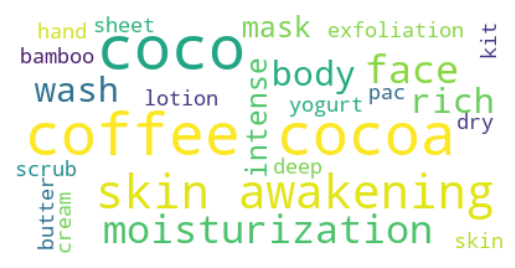

Cluster: 5
Titles
Spotless Skin Combo: Ubtan Facewash  100ml and ...
Bye Bye Dark Circles Eye Cream with Cucumber & ...
Bye Bye Blemishes Face Cream for Reducing Pigme...
Skin Illuminate Face Serum and Bye Bye Dark Cir...
Bye Bye Blemishes 30g and Bye Bye Dark Circles ...
Skin Illuminate Face Serum and Bye Bye Blemishe...
Tea Tree Face Wash and Bye Bye Blemishes 30ml C...


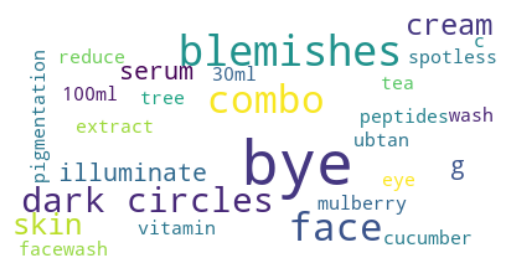

In [18]:
result={'cluster':labels,'data':data['Tokens']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['data'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=data_clus[data_clus.cluster==k]['Product Name']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()